In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

##qtensor imports
# import qtensor
# from qtensor import QAOA_energy
# from qtensor import parameter_optimization as popt
# import torch

In [2]:
file3 = open("New110Distinct20NodeRandomGraphs.txt")
mat_list = np.loadtxt(file3).reshape(110,20,20)
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)
graphs = g_list

In [3]:
datas = [[],[],[],[]]
for i in range(1,6,1):
    resi = []
    
    file = open('Similarity110DistinctSep19Pt'+str(i)+'.txt', 'r', newline = '')
    resi = (np.loadtxt(file).reshape(4,2420)).tolist()
    print(len(resi))
    for j in range(4):
        for k in resi[j]:
            datas[j].append(float(k))
            
a = datas[2]
b= datas[3]

4
4
4
4
4


In [4]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

ev_deg_dict ={}
n = len(graphs)
for i in range(n):
  ev_deg_dict[i] = even_percent(graphs[i])

In [5]:
ev_deg_dict

{0: 0.0,
 1: 0.1,
 2: 0.2,
 3: 0.3,
 4: 0.4,
 5: 0.5,
 6: 0.6,
 7: 0.7,
 8: 0.8,
 9: 0.9,
 10: 1.0,
 11: 0.0,
 12: 0.1,
 13: 0.2,
 14: 0.3,
 15: 0.4,
 16: 0.5,
 17: 0.6,
 18: 0.7,
 19: 0.8,
 20: 0.9,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.1,
 31: 0.1,
 32: 0.1,
 33: 0.1,
 34: 0.1,
 35: 0.1,
 36: 0.1,
 37: 0.1,
 38: 0.2,
 39: 0.2,
 40: 0.2,
 41: 0.2,
 42: 0.2,
 43: 0.2,
 44: 0.2,
 45: 0.2,
 46: 0.3,
 47: 0.3,
 48: 0.3,
 49: 0.3,
 50: 0.3,
 51: 0.3,
 52: 0.3,
 53: 0.3,
 54: 0.4,
 55: 0.4,
 56: 0.4,
 57: 0.4,
 58: 0.4,
 59: 0.4,
 60: 0.4,
 61: 0.4,
 62: 0.5,
 63: 0.5,
 64: 0.5,
 65: 0.5,
 66: 0.5,
 67: 0.5,
 68: 0.5,
 69: 0.5,
 70: 0.6,
 71: 0.6,
 72: 0.6,
 73: 0.6,
 74: 0.6,
 75: 0.6,
 76: 0.6,
 77: 0.6,
 78: 0.7,
 79: 0.7,
 80: 0.7,
 81: 0.7,
 82: 0.7,
 83: 0.7,
 84: 0.7,
 85: 0.7,
 86: 0.8,
 87: 0.8,
 88: 0.8,
 89: 0.8,
 90: 0.8,
 91: 0.8,
 92: 0.8,
 93: 0.8,
 94: 0.9,
 95: 0.9,
 96: 0.9,
 97: 0.9,
 98: 0.9,
 99: 0.9,
 100: 0.9,

In [6]:
def three_centers(graph):
    """
    Returns approx ratios at 3 groups of centers
    """
    ev = even_percent(graph)
    a = 1
    b = 0.5+(1-ev)*0.5
    c = 0.5+(ev)*0.5
    return [a,b,c]

In [7]:
three_centers(graphs[21])

[1, 0.5, 1.0]

In [8]:
def parity_metric(donor, acceptor):
    """
    returns parity metric approx for similarity
    """
    a1,b1,c1 = three_centers(donor)
    a2,b2,c2 = three_centers(acceptor)
    
    univ_optimas = 10
    
    if (b1>0.75) and (c1<0.75):
        #mid_optimas = (.25 + 0.75*((b1-0.75)/0.25))*10
        mid_optimas = (((b1-0.75)/0.25))*10
        univ_optimas += (10-mid_optimas)
        sim = (mid_optimas*b2 + univ_optimas*a2)/20
        
    elif (b1<0.75) and (c1>0.75):
        #mid_optimas = (.25 + 0.75*((c1-0.75)/0.25))*10
        mid_optimas = (((c1-0.75)/0.25))*10
        univ_optimas += (10-mid_optimas)
        sim = (mid_optimas*c2 + univ_optimas*a2)/20
    else:
        univ_optimas = 20
        sim = (univ_optimas*a2)/20
        
    return sim
    
    
    

In [9]:
i = 10
j = 11
print(even_percent(graphs[i]))
print(even_percent(graphs[j]))
print(a[i*55 + j])
print(parity_metric(donor= graphs[i], acceptor= graphs[j]))

1.0
0.0
0.8765252010169121
0.75


In [10]:
def sort_for_plot(graphs = graphs, av =a,sub = b, ev_deg_dict = ev_deg_dict):
  """
  For plotting purposes, creates x,y,c lists
  """
  n = len(graphs)
  seeds = 20
  x = []
  y = []
  c = []
  d = []
  e = []
  for i in range(n):
    
    for j in range(n):
      x.append(ev_deg_dict[i])
      y.append(ev_deg_dict[j])
      print(n)
      r =  av[i*n + j]
      c.append(float(r))
      d_ = parity_metric(graphs[i], graphs[j])
      d.append(d_)
      e.append(d_-r)
  return x, y, c,d,e

In [11]:
%%capture
a,b ,c,d,e = sort_for_plot()

In [12]:
a

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1

In [13]:
d

[1.0,
 0.975,
 0.95,
 0.925,
 0.9,
 0.875,
 0.85,
 0.825,
 0.8,
 0.775,
 0.75,
 1.0,
 0.975,
 0.95,
 0.925,
 0.9,
 0.875,
 0.85,
 0.825,
 0.8,
 0.775,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.825,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 1.0,
 0.9800000000000001,
 0.96,
 0.9400000000000001,
 0.9199999999999999,
 0.9,
 0.8800000000000001,
 0.8600000000000001,
 0.8400000000000001,
 0.8200000000000001,
 0.8,
 1.0,
 0.9800000000000001,
 0.96,
 0.9

In [14]:
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize

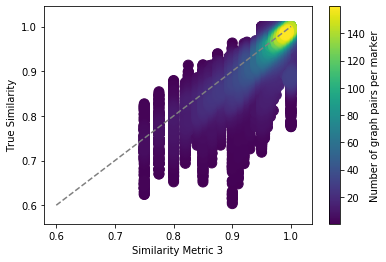

In [15]:
fig , ax = plt.subplots()
# Generate fake data
x = d
y = c

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = np.argsort(z)
new_x = [x[i] for i in idx]
new_y = [y[i] for i in idx]
new_z = [z[i] for i in idx]


#fig, ax = plt.subplots()
ax.scatter(new_x, new_y, c=new_z, s=100)
#plt.colorbar()
# cbar = plt.colorbar(label = "Number of graph pairs per marker")



norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Number of graph pairs per marker')

######################
low = min(x+y)
ax.plot([0.6, 1], [0.6, 1], color = 'gray', linestyle = '--')

#####################
ax.set_ylabel("True Similarity")#, fontsize = 20)
ax.set_xlabel("Similarity Metric 3")#, fontsize = 20)
fig.savefig("fig_SimilarityMetric3.pdf", dpi = 1000)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(c, d)
print(mse)

0.003728205797396624


In [17]:
np.corrcoef(c,d)

array([[1.        , 0.77206129],
       [0.77206129, 1.        ]])

# Parity Analysis


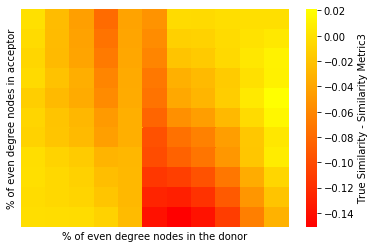

In [18]:
import numpy as np
matrix = np.zeros((11,11,100))
pointer_matrix = np.zeros((11,11))

########################################
n_graphs = len(graphs)
for i in range(n_graphs):
  for j in range(n_graphs):
    don = even_percent(graphs[i])
    don_ind = int((don*10))
    acc = even_percent(graphs[j])
    acc_ind = int((acc*10))
    a_sim = c[i*len(graphs) +j]-d[i*len(graphs) +j]

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1 
######################################################
new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    n_terms = int(pointer_matrix[i][j])
    for k in range(n_terms):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)
    
#####################################

df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)
#vmin = -1*np.max(new_matrix)
ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels=False, yticklabels=False, cbar_kws={'label': 'True Similarity - Similarity Metric3'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()

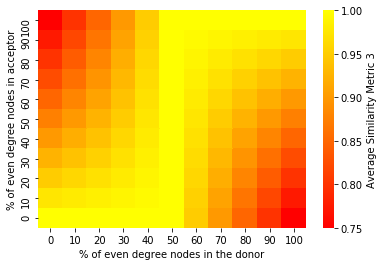

In [20]:
import numpy as np
matrix = np.zeros((11,11,100))
pointer_matrix = np.zeros((11,11))
fig,ax = plt.subplots()
########################################
n_graphs = len(graphs)
for i in range(n_graphs):
  for j in range(n_graphs):
    don = even_percent(graphs[i])
    don_ind = int((don*10))
    acc = even_percent(graphs[j])
    acc_ind = int((acc*10))
    a_sim = d[i*len(graphs) +j]

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1 
######################################################
new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    n_terms = int(pointer_matrix[i][j])
    for k in range(n_terms):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)
    
#####################################

df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)
#vmin = -1*np.max(new_matrix)
ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels = [str(i) for i in range(0,110,10)], yticklabels= [str(100-i) for i in range(0,110,10)], cbar_kws={'label': 'Average Similarity Metric 3'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()
fig.savefig("fig_SimilarityMetric3_parity.pdf", dpi = 1000)